**Suman Roy, MDS202041**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise

## Q1. Edge detection techniques

### a) Sobel Kernel

In [36]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/building.jpg', 0)
img_wo_noise = cv2.GaussianBlur(img, (3, 3), 1.5)


In [4]:
sobel_filter_vertical = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_filter_horizontal = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

In [5]:
def sobel(img, sobel_filter_vertical, sobel_filter_horizontal):
    sobel_filter_vertical = cv2.flip(sobel_filter_vertical, -1)
    sobel_filter_horizontal = cv2.flip(sobel_filter_horizontal, -1)
    
    sobel_vertical = cv2.filter2D(img, -1, sobel_filter_vertical)
    sobel_horizontal = cv2.filter2D(img, -1, sobel_filter_horizontal)
    
    result = (0.5* sobel_vertical) + (0.5*sobel_horizontal)
    return result

In [6]:
sobel_img = sobel(img, sobel_filter_vertical, sobel_filter_horizontal)
sobel_img_wo_noise = sobel(img_wo_noise, sobel_filter_vertical, sobel_filter_horizontal)

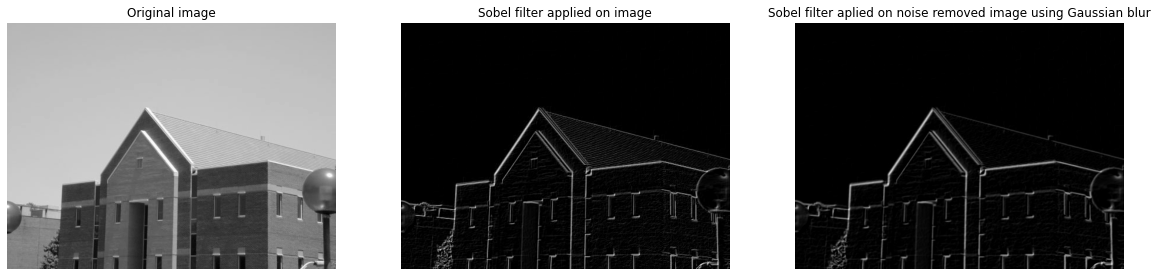

In [7]:
fig, axs = plt.subplots(1,3, figsize = (20,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(sobel_img, cmap = 'gray')
axs[1].set_title("Sobel filter applied on image")
axs[1].axis('off')
axs[2].imshow(sobel_img_wo_noise, cmap = 'gray')
axs[2].set_title("Sobel filter aplied on noise removed image using Gaussian blur")
axs[2].axis('off')
plt.show()

**Thresholding**

In [12]:
def threshold(img, threshold = 30):
    M,N = img.shape
    out = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            if img[i,j]>threshold:
                out[i,j] = 255
    return out

(-0.5, 559.5, 419.5, -0.5)

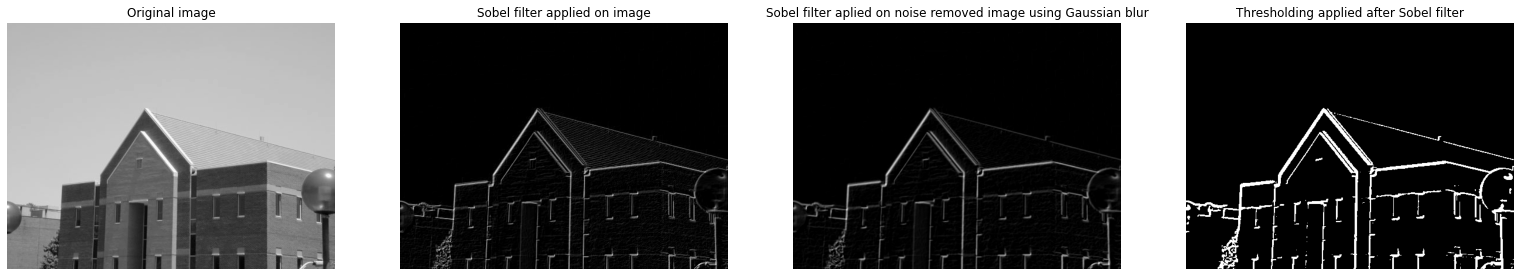

In [13]:
sobel_threshold = threshold(sobel_img_wo_noise)
fig, axs = plt.subplots(1,4, figsize = (27,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(sobel_img, cmap = 'gray')
axs[1].set_title("Sobel filter applied on image")
axs[1].axis('off')
axs[2].imshow(sobel_img_wo_noise, cmap = 'gray')
axs[2].set_title("Sobel filter aplied on noise removed image using Gaussian blur")
axs[2].axis('off')
axs[3].imshow(sobel_threshold, cmap = 'gray')
axs[3].set_title("Thresholding applied after Sobel filter")
axs[3].axis('off')



### LoG

In [14]:
def LoG(img):
    img_denoised = cv2.GaussianBlur(img, (3, 3), 1.5)
    res = cv2.Laplacian(img_denoised, cv2.CV_64F)
    return res

In [15]:
def zerocrossing(img):
    M,N = img.shape
    res = np.zeros((M,N))
    for i in range(M-1):
        for j in range(N-1):
            nbd = [img[i-1,j-1], img[i-1,j],img[i-1,j+1], img[i,j-1], img[i,j+1], img[i+1,j-1],img[i+1,j], img[i+1,j+1]]
            positive_count = 0
            negative_count = 0    
            d = max(nbd)
            e = min(nbd)         
            for nb in nbd:
                if nb>0:
                    positive_count+=1
                elif nb<0:
                    negative_count+=1                
            #zero crossing
            z_c = ((negative_count > 0) and (positive_count > 0))        
            # Changing the pixel value with the maximum neighborhood difference with the pixel
            if z_c:
                if img[i,j]>0:
                    res[i, j] = img[i,j] + np.abs(e)
                elif img[i,j]<0:
                    res[i, j] = np.abs(img[i,j]) + d        
    # Normalize and change datatype to 'uint8' (optional)
    res_norm = res/res.max()*255
    res = np.uint8(res_norm)
    return res

(-0.5, 559.5, 419.5, -0.5)

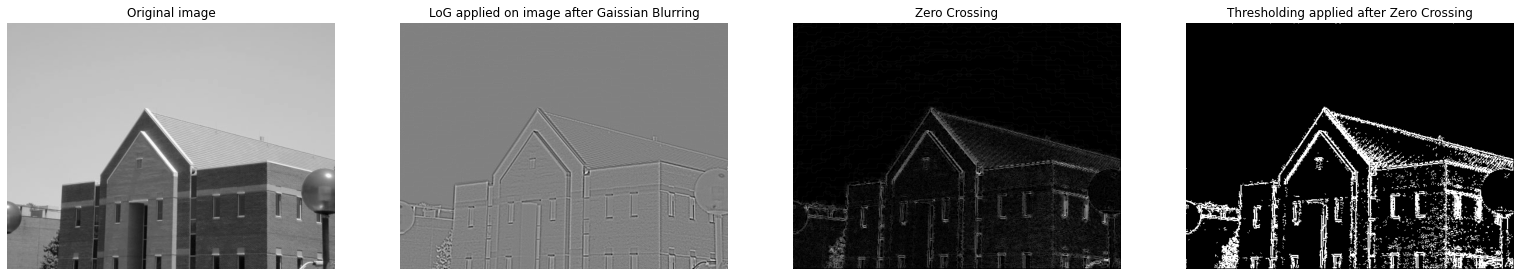

In [17]:
fig, axs = plt.subplots(1,4, figsize = (27,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(LoG(img), cmap = 'gray')
axs[1].set_title("LoG applied on image after Gaissian Blurring")
axs[1].axis('off')
axs[2].imshow(zerocrossing(LoG(img)), cmap = 'gray')
axs[2].set_title("Zero Crossing")
axs[2].axis('off')
axs[3].imshow(threshold(zerocrossing(LoG(img))), cmap = 'gray')
axs[3].set_title("Thresholding applied after Zero Crossing")
axs[3].axis('off')

### Canny Edge Detection

In [25]:
edges = cv2.Canny(img,50,200)
edges_wo_noise=cv2.Canny(img_wo_noise,50,200)
threshold_canny=threshold(edges_wo_noise)

(-0.5, 559.5, 419.5, -0.5)

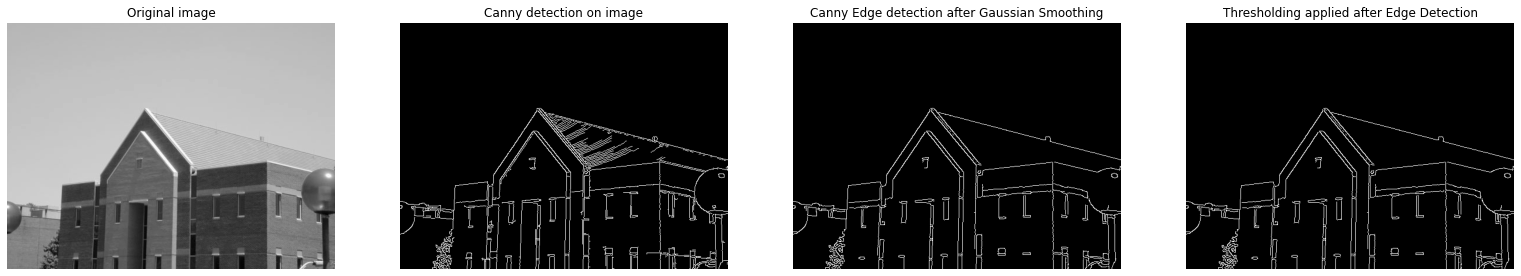

In [26]:
fig, axs = plt.subplots(1,4, figsize = (27,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(edges, cmap = 'gray')
axs[1].set_title("Canny detection on image")
axs[1].axis('off')
axs[2].imshow(edges_wo_noise, cmap = 'gray')
axs[2].set_title("Canny Edge detection after Gaussian Smoothing")
axs[2].axis('off')
axs[3].imshow(threshold_canny, cmap = 'gray')
axs[3].set_title("Thresholding applied after Edge Detection")
axs[3].axis('off')

### Hough Transform

In [41]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/building.jpg', 0)
img_wo_noise = cv2.GaussianBlur(img, (3, 3), 1.5)


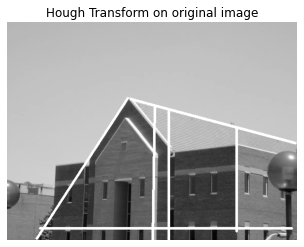

In [39]:
hough_lines = cv2.HoughLinesP(edges, 2, np.pi/180, threshold = 200, minLineLength=100, 
                        maxLineGap=150)
# Drawing lines on the image
for line in hough_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title("Hough Transform on original image")
plt.show()

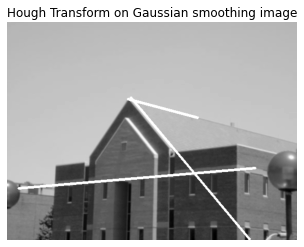

In [42]:
hough_lines_wo_noise = cv2.HoughLinesP(edges_wo_noise, 2, np.pi/180, threshold = 200, minLineLength=100, 
                        maxLineGap=150)
# Drawing lines on the image
for line in hough_lines_wo_noise:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_wo_noise, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
plt.imshow(img_wo_noise, cmap = 'gray')
plt.axis('off')
plt.title("Hough Transform on Gaussian smoothing image")
plt.show()

## **building.jpg**

In [43]:
def sobel_edge_detector(img):
    img_noise_removed = cv2.GaussianBlur(img, (3, 3), 1.5)

    sobel_filter_x = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])

    sobel_filter_y = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])
    
    sobel_img = sobel(img_noise_removed, sobel_filter_x, sobel_filter_y)
    
    sobel_img_threshold = threshold(sobel_img)
    return sobel_img_threshold

def LoG_Edge_detector(img):
    res = LoG(img)
    res = zerocrossing(res)
    res = threshold(res, threshold = 35)
    return res

def canny_Edge_detector(img, t1 = 50, t2  = 200):
    return cv2.Canny(img,t1,t2)

def Hough_Edge_detector(img, t1 = 50, t2 = 200):
    hough_img = img.copy()
    edges = cv2.Canny(hough_img,t1,t2)
    lines = cv2.HoughLinesP(edges, 2, np.pi/180, threshold = 200, minLineLength=100, 
                            maxLineGap=150)

    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    return hough_img

def Hough_Circle_detector(img):
    hough_img = img.copy()
    img_blur = cv2.GaussianBlur(hough_img, (3, 3), 1.5)
    # Apply hough transform on the image
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=50, param2=30, minRadius=5, maxRadius=30)
    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw outer circle
            cv2.circle(hough_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw inner circle
            cv2.circle(hough_img, (i[0], i[1]), 2, (0, 0, 255), 3)
            
    return hough_img

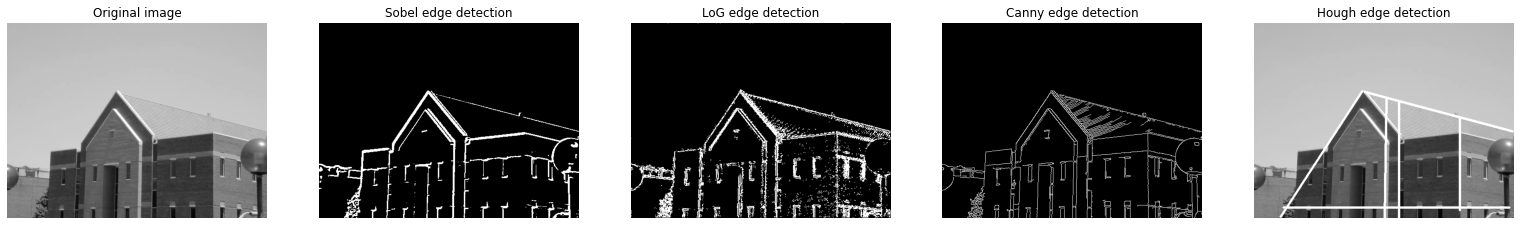

In [46]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/building.jpg', 0)
fig, axs = plt.subplots(1,5, figsize = (27,15))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')

axs[1].imshow(sobel_edge_detector(img), cmap = 'gray')
axs[1].set_title("Sobel edge detection")
axs[1].axis('off')
axs[2].imshow(LoG_Edge_detector(img), cmap = 'gray')
axs[2].set_title("LoG edge detection")
axs[2].axis('off')
axs[3].imshow(canny_Edge_detector(img), cmap = 'gray')
axs[3].set_title("Canny edge detection")
axs[3].axis('off')
axs[4].imshow(Hough_Edge_detector(img), cmap = 'gray')
axs[4].set_title("Hough edge detection")
axs[4].axis('off')
plt.show()

### **objects.jpg**

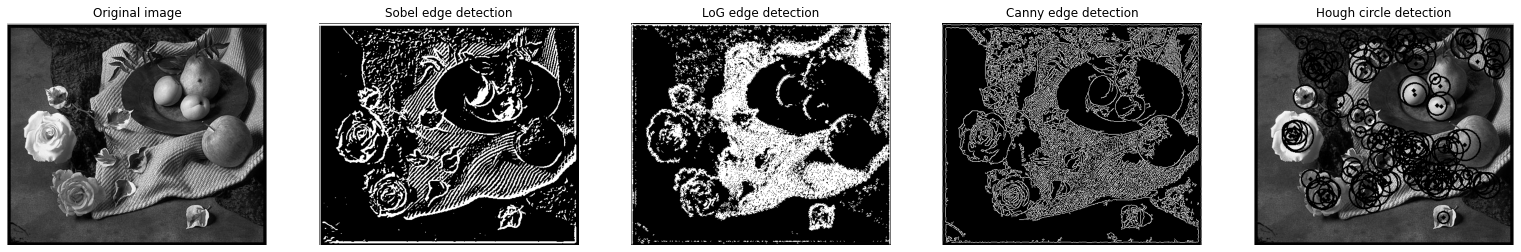

In [50]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/objects.png', 0)
fig, axs = plt.subplots(1,5, figsize = (27,15))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(sobel_edge_detector(img), cmap = 'gray')
axs[1].set_title("Sobel edge detection")
axs[1].axis('off')
axs[2].imshow(LoG_Edge_detector(img), cmap = 'gray')
axs[2].set_title("LoG edge detection")
axs[2].axis('off')
axs[3].imshow(canny_Edge_detector(img), cmap = 'gray')
axs[3].set_title("Canny edge detection")
axs[3].axis('off')
axs[4].imshow(Hough_Circle_detector(img), cmap = 'gray')
axs[4].set_title("Hough circle detection")
axs[4].axis('off')
plt.show()

From these results we can see that canny edge detection works best for 'building.jpg'. Hou transform also produces good result and Sobel and LoG don't do bad either. 


For 'objects.jpg', we can see that sobel detection works best. Hough circle detector is also able to perform nicely. Canny and LoG don't produce satisfactory results. 

## Noising and Denoising

### a) Adding noise

In [4]:
def periodic_noise(img, A = 0.5, omega = np.pi/2):
    M,N = img.shape
    res = np.zeros((M,N), dtype = np.float64)
    #add noise Asin(omega*i) + Asin(omega*j) to img(i,j) 
    for i in range(M):
        for j in range(N):
            res[i,j] = img[i,j] + A*np.sin(omega*i) + A*np.sin(omega*j)
            
    return res.astype(np.uint8)

In [35]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/checkerboard.png',0)
# adding gaussian noise
gaussian_noisy_img = random_noise(img, mode = 'gaussian')
gaussian_noisy_img = gaussian_noisy_img * 255.0
gaussian_noisy_img = gaussian_noisy_img.astype(np.uint8)

# adding salt and pepper noise
salt_pepper_img = random_noise(img, mode = 's&p')
salt_pepper_img = salt_pepper_img * 255.0
salt_pepper_img = salt_pepper_img.astype(np.uint8)

# add periodic noise
periodic_noisy_img = periodic_noise(img)

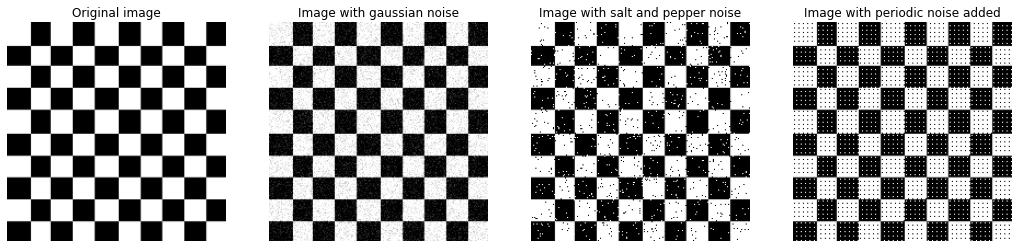

In [54]:
fig, axs = plt.subplots(1,4, figsize = (18,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(gaussian_noisy_img, cmap = 'gray')
axs[1].set_title("Image with gaussian noise")
axs[1].axis('off')
axs[2].imshow(salt_pepper_img, cmap = 'gray')
axs[2].set_title("Image with salt and pepper noise")
axs[2].axis('off')
axs[3].imshow(periodic_noisy_img, cmap = 'gray')
axs[3].set_title("Image with periodic noise added")
axs[3].axis('off')
plt.show()

### b) Image denoising

**Denoising of Gaussian Noisy image**

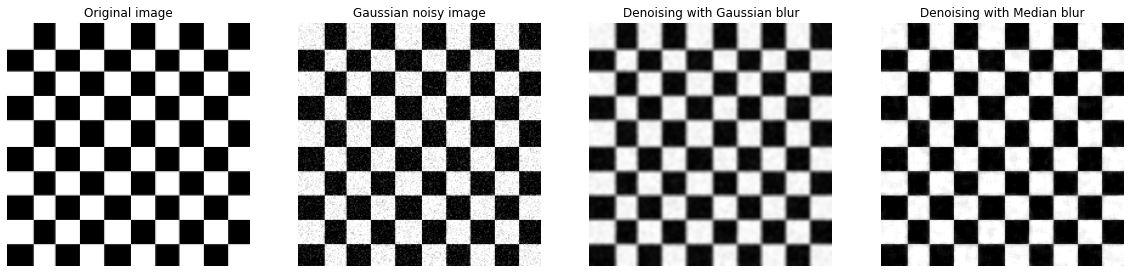

In [58]:
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(gaussian_noisy_img, cmap = 'gray')
axs[1].set_title("Gaussian noisy image")
axs[1].axis('off')
axs[2].imshow(cv2.GaussianBlur(gaussian_noisy_img, (5,5), 1.5), cmap = 'gray')   #Guassian_blur
axs[2].set_title("Denoising with Gaussian blur")
axs[2].axis('off')
axs[3].imshow(cv2.medianBlur(gaussian_noisy_img, 5), cmap = 'gray')   #median_blur
axs[3].set_title("Denoising with Median blur")
axs[3].axis('off')
plt.show()

**Denoising of Salt-Pepper noisy image**

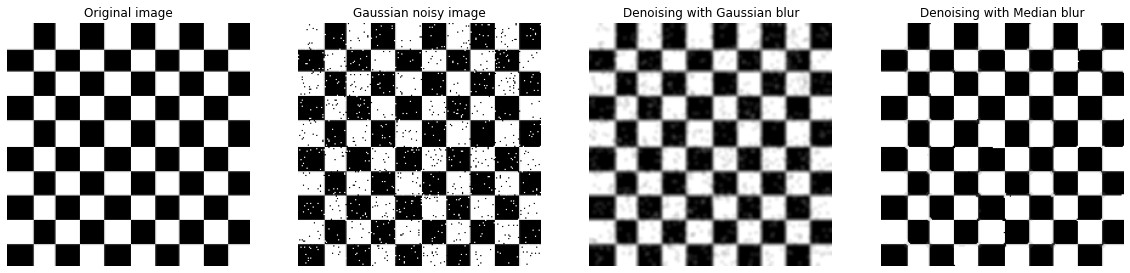

In [59]:
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(salt_pepper_img, cmap = 'gray')
axs[1].set_title("Gaussian noisy image")
axs[1].axis('off')
axs[2].imshow(cv2.GaussianBlur(salt_pepper_img, (5,5), 1.5), cmap = 'gray')   #Guassian_blur
axs[2].set_title("Denoising with Gaussian blur")
axs[2].axis('off')
axs[3].imshow(cv2.medianBlur(salt_pepper_img, 5), cmap = 'gray')   #median_blur
axs[3].set_title("Denoising with Median blur")
axs[3].axis('off')
plt.show()

**Denoising of Periodic noise image**

In [34]:
import math
def get_fshift_and_dft(img):
  img = np.asarray(img)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  dft = 20 * np.log(np.abs(fshift))
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)

  magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
  magnitude_spectrum_new = 20*np.log(1 + magnitude_spectrum)
  result = np.where(magnitude_spectrum_new == np.amax(magnitude_spectrum_new))
  result  = magnitude_spectrum_new.argsort(axis=-1, kind=None, order=None)[-9:][::-1]
  
  points =[]
  for i in range(9):
    highest, high_index = -1, 0.1
    for ind_i,i in enumerate(magnitude_spectrum_new):
      for ind_j,j in enumerate(i):
        if j>highest and not((ind_i, ind_j) in points):
          highest= j
          high_index=(ind_i, ind_j)
    points.append(high_index)

  return points[1:]

# Applying Ideal-Notch Filter
def ideal_notch(img):
  img = np.asarray(img)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  dft, d0 = 20 * np.log(np.abs(fshift)), 0.5
  M, N  = fshift.shape
  
  points = get_fshift_and_dft(img.copy())
  for u in range(M):
    for v in range(N):
      for d in range(len(points)):
        u0, v0 = points[d][0], points[d][1]
        d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 1)
        d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 1)
        if d1 <= d0 or d2 <= d0:
          fshift[u][v] *= 0.0
  f_ishift = np.fft.ifftshift(fshift)
  return np.abs(np.fft.ifft2(f_ishift))

# Applying Butterworth-Notch Filter
def butter_notch(img):
  img = np.asarray(img)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  dft, d0, eps = 20 * np.log(np.abs(fshift)), 0.5, 0.000001
  points = get_fshift_and_dft(img.copy())
  
  M, N = fshift.shape
  for u in range(M):
    for v in range(N):
      for d in range(len(points)):
        u0, v0 = points[d][0], points[d][1]
        d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
        d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5) 
        fshift[u][v] *= (1.0 / (1 + pow((d0 * d0) / (d1 * d2 + eps), 1))) 
  f_ishift = np.fft.ifftshift(fshift)
  return np.abs(np.fft.ifft2(f_ishift))

#defining the Gaussian notch filter
def gauss_notch(img):
  img = np.asarray(img)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  dft, d0 = 20 * np.log(np.abs(fshift)), 0.5
  points = get_fshift_and_dft(img.copy())

  M, N = fshift.shape
  for u in range(M):
    for v in range(N):
      for d in range(len(points)):
        u0, v0 = points[d][0], points[d][1]
        d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
        d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)
        fshift[u][v] *= (1 - math.exp(-0.5 * (d1 * d2 / pow(d0, 2))))

  f_ishift = np.fft.ifftshift(fshift)
  return np.abs(np.fft.ifft2(f_ishift))

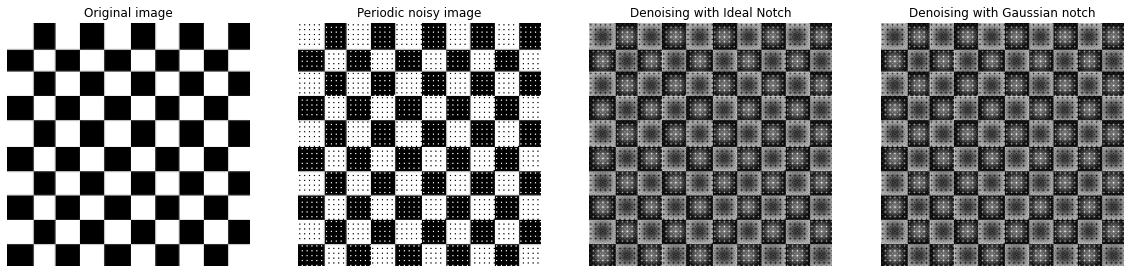

In [37]:
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(periodic_noisy_img, cmap = 'gray')
axs[1].set_title("Periodic noisy image")
axs[1].axis('off')
axs[2].imshow(ideal_notch(periodic_noisy_img), cmap = 'gray')   #ideal notch flter
axs[2].set_title("Denoising with Ideal Notch")
axs[2].axis('off')
axs[3].imshow(gauss_notch(periodic_noisy_img), cmap = 'gray')   #gaussian notch
axs[3].set_title("Denoising with Gaussian notch")
axs[3].axis('off')
plt.show()

### c) Applying notch filters on different images

**notch1.jpg**

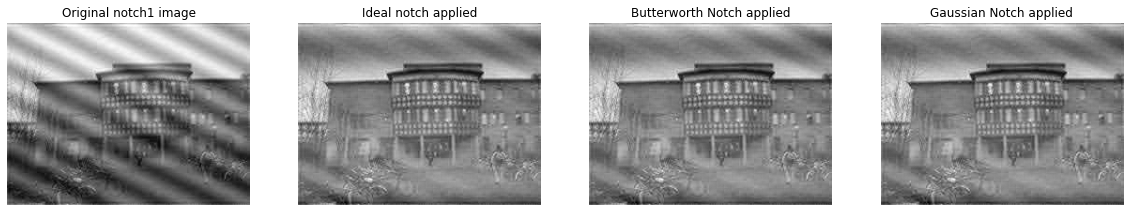

In [39]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/notch1.jpg',0)
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original notch1 image")
axs[0].axis('off')
axs[1].imshow(ideal_notch(img), cmap = 'gray')
axs[1].set_title("Ideal notch applied")
axs[1].axis('off')
axs[2].imshow(butter_notch(img), cmap = 'gray')   #ideal notch flter
axs[2].set_title("Butterworth Notch applied")
axs[2].axis('off')
axs[3].imshow(gauss_notch(img), cmap = 'gray')   #gaussian notch
axs[3].set_title("Gaussian Notch applied")
axs[3].axis('off')
plt.show()

**notch2.jpg**

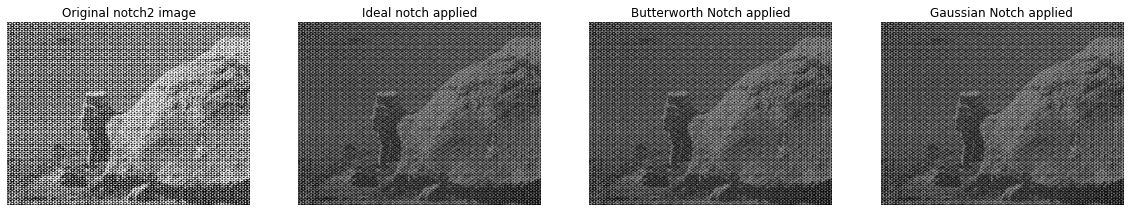

In [41]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/notch2.png',0)
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original notch2 image")
axs[0].axis('off')
axs[1].imshow(ideal_notch(img), cmap = 'gray')
axs[1].set_title("Ideal notch applied")
axs[1].axis('off')
axs[2].imshow(butter_notch(img), cmap = 'gray')   #ideal notch flter
axs[2].set_title("Butterworth Notch applied")
axs[2].axis('off')
axs[3].imshow(gauss_notch(img), cmap = 'gray')   #gaussian notch
axs[3].set_title("Gaussian Notch applied")
axs[3].axis('off')
plt.show()

**notch3.jpg**

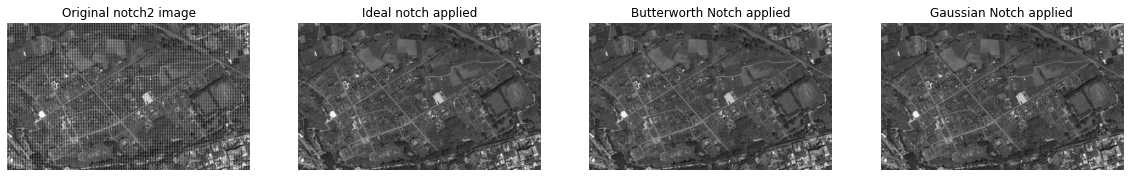

In [42]:
img = cv2.imread('/content/drive/MyDrive/CV_Pics/notch3.jpg',0)
fig, axs = plt.subplots(1,4, figsize = (20,8))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original notch2 image")
axs[0].axis('off')
axs[1].imshow(ideal_notch(img), cmap = 'gray')
axs[1].set_title("Ideal notch applied")
axs[1].axis('off')
axs[2].imshow(butter_notch(img), cmap = 'gray')   #ideal notch flter
axs[2].set_title("Butterworth Notch applied")
axs[2].axis('off')
axs[3].imshow(gauss_notch(img), cmap = 'gray')   #gaussian notch
axs[3].set_title("Gaussian Notch applied")
axs[3].axis('off')
plt.show()

## Q3. Thresholding Comparison

### **Global Thresholding**

In [10]:
img1 = cv2.imread('/content/drive/MyDrive/CV_Pics/fingerprint1.jpg',0)
img2= cv2.imread('/content/drive/MyDrive/CV_Pics/fingerprint2.jpg',0)
img3= cv2.imread('/content/drive/MyDrive/CV_Pics/bookpage.jpg',0)

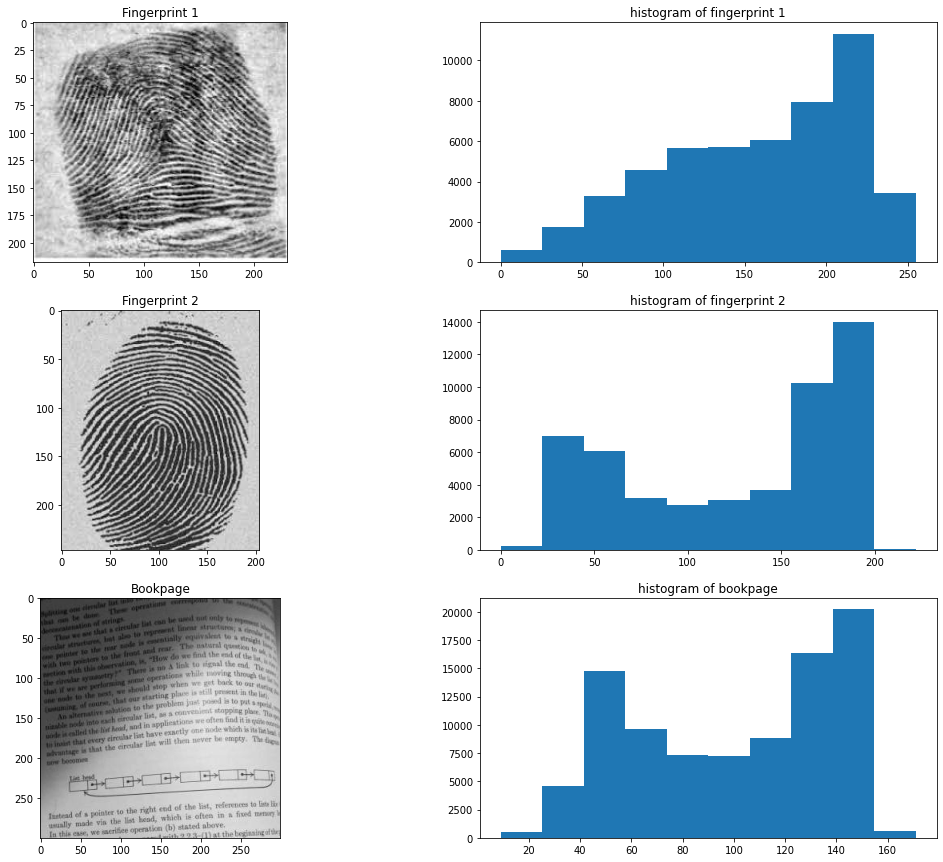

In [12]:
fig, axs = plt.subplots(3,2, figsize = (18,15))

axs[0,0].imshow(img1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")
axs[0,0].axis('off')
axs[0,1].hist(img1.ravel())
axs[0,1].set_title("histogram of fingerprint 1")

axs[1,0].imshow(img2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")
axs[1,0].axis('off')
axs[1,1].hist(img2.ravel())
axs[1,1].set_title("histogram of fingerprint 2")

axs[2,0].imshow(img3, cmap = 'gray')
axs[2,0].set_title("Bookpage")
axs[2,0].axis('off')
axs[2,1].hist(img3.ravel())
axs[2,1].set_title("histogram of bookpage")

plt.show()

From the histogram of these images the threshold values of 160, 120 and 110 are selected respectively for the images fingerprint1, fingerprint2 and bookpage respectively.

In [25]:
img1_threshold_value = 160
img2_threshold_value = 120
img3_threshold_value = 110

In [26]:
x,img1_thres = cv2.threshold(img1,img1_threshold_value,255,cv2.THRESH_BINARY)
x,img2_thres = cv2.threshold(img2,img2_threshold_value,255,cv2.THRESH_BINARY)
x,img3_thres = cv2.threshold(img3,img3_threshold_value,255,cv2.THRESH_BINARY)

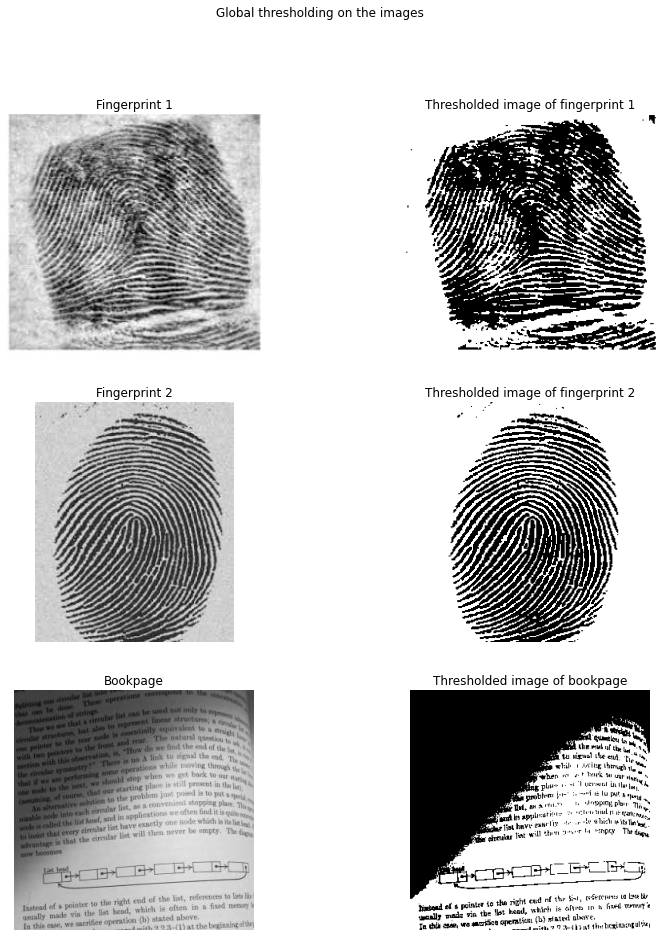

In [27]:
fig, axs = plt.subplots(3,2, figsize = (13,15))

axs[0,0].imshow(img1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")
axs[0,0].axis('off')
axs[0,1].imshow(img1_thres, cmap = 'gray')
axs[0,1].set_title("Thresholded image of fingerprint 1")
axs[0,1].axis('off')
axs[1,0].imshow(img2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")
axs[1,0].axis('off')
axs[1,1].imshow(img2_thres, cmap = 'gray')
axs[1,1].set_title("Thresholded image of fingerprint 2")
axs[1,1].axis('off')
axs[2,0].imshow(img3, cmap = 'gray')
axs[2,0].set_title("Bookpage")
axs[2,0].axis('off')
axs[2,1].imshow(img3_thres, cmap = 'gray')
axs[2,1].set_title("Thresholded image of bookpage")
axs[2,1].axis('off')
plt.suptitle("Global thresholding on the images")
plt.show()

### Otsu's method

In [28]:
x1,img1_thres_2 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x2, img2_thres_2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x3, img3_thres_2 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

# Thresholds calculated by Otsu's method for the images:
x1,x2,x3

(149.0, 113.0, 95.0)

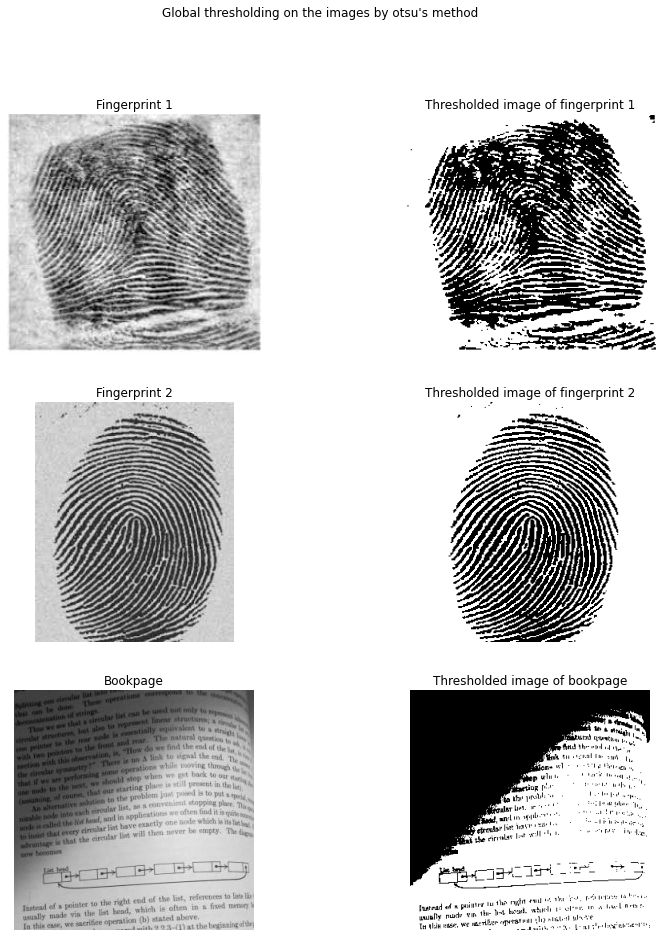

In [30]:
fig, axs = plt.subplots(3,2, figsize = (13,15))

axs[0,0].imshow(img1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")
axs[0,0].axis('off')
axs[0,1].imshow(img1_thres_2, cmap = 'gray')
axs[0,1].set_title("Thresholded image of fingerprint 1")
axs[0,1].axis('off')
axs[1,0].imshow(img2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")
axs[1,0].axis('off')
axs[1,1].imshow(img2_thres_2, cmap = 'gray')
axs[1,1].set_title("Thresholded image of fingerprint 2")
axs[1,1].axis('off')
axs[2,0].imshow(img3, cmap = 'gray')
axs[2,0].set_title("Bookpage")
axs[2,0].axis('off')
axs[2,1].imshow(img3_thres_2, cmap = 'gray')
axs[2,1].set_title("Thresholded image of bookpage")
axs[2,1].axis('off')
plt.suptitle("Global thresholding on the images by otsu's method")
plt.show()

### Adaptive Thresholding

In [31]:
img1_thres_mean = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
img2_thres_mean = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
img3_thres_mean = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

img1_thres_gaussian = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img2_thres_gaussian = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img3_thres_gaussian = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

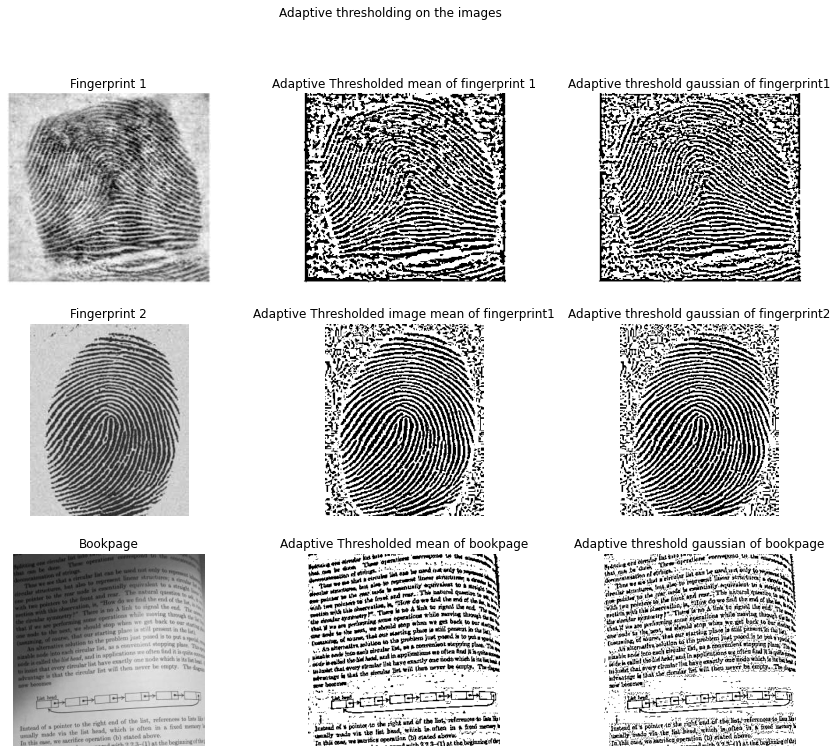

In [32]:
fig, axs = plt.subplots(3,3, figsize = (15,12))

axs[0,0].imshow(img1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")

axs[0,1].imshow(img1_thres_mean, cmap = 'gray')
axs[0,1].set_title("Adaptive Thresholded mean of fingerprint 1")

axs[0,2].imshow(img1_thres_gaussian, cmap ='gray')
axs[0,2].set_title("Adaptive threshold gaussian of fingerprint1")

axs[1,0].imshow(img2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")

axs[1,1].imshow(img2_thres_mean, cmap = 'gray')
axs[1,1].set_title("Adaptive Thresholded image mean of fingerprint1")

axs[1,2].imshow(img2_thres_gaussian, cmap ='gray')
axs[1,2].set_title("Adaptive threshold gaussian of fingerprint2")

axs[2,0].imshow(img3, cmap = 'gray')
axs[2,0].set_title("Bookpage")

axs[2,1].imshow(img3_thres_mean, cmap = 'gray')
axs[2,1].set_title("Adaptive Thresholded mean of bookpage")

axs[2,2].imshow(img3_thres_gaussian, cmap ='gray')
axs[2,2].set_title("Adaptive threshold gaussian of bookpage")
for i in range(3):
  for j in range(3):
    axs[i,j].axis('off')
plt.suptitle("Adaptive thresholding on the images")
plt.show()